In [ ]:
# 구글 드라이브의 폴더와 구글 코랩 폴더 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 현재 경로 확인
!pwd

/content/drive/My Drive/Colab Notebooks


In [ ]:
# drive/My Drive/Colab Notebooks 경로로 변경
%cd drive/My\ Drive/Colab\ Notebooks\

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks'
/content/drive/My Drive/Colab Notebooks


## YOLO (You Only Look Once)

In [ ]:
import tensorflow as tf 

In [ ]:
vgg = tf.keras.applications.VGG16()

553476096/553467096 [==============================] - 6s 0us/step


In [ ]:
vgg.layers[2].get_config()

{'activation': 'relu',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'dtype': 'float32',
 'filters': 64,
 'groups': 1,
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'kernel_regularizer': None,
 'kernel_size': (3, 3),
 'name': 'block1_conv2',
 'padding': 'same',
 'strides': (1, 1),
 'trainable': True,
 'use_bias': True}

In [ ]:
layer = tf.keras.layers.Dense(2)
layer.build((None,2))  

In [ ]:
layer.weights

[<tf.Variable 'kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[-0.9223565 , -0.76073015],
        [-0.94507563,  0.25733256]], dtype=float32)>,
 <tf.Variable 'bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>]

In [ ]:
layer2 = tf.keras.layers.Dense(2) # __call__는 build가 되어 있는지 확인하고 되어 있으면 call 연산  
layer2(tf.constant([[1,2,3],[4,5,6]])) # build가 되어 있지 않으면 build후 call 연산 

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 2.7301223, -2.2875605],
       [ 5.7739477, -3.6619558]], dtype=float32)>

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2, input_shape(2,)) # (None,2) => 요소가 2개인 데이터 N개 
])

In [ ]:
model(tf.constant([[1,2,3],[4,5,6]]))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 5.3184466,  3.66491  ],
       [12.929317 ,  7.4551005]], dtype=float32)>

In [ ]:
model.input_shape # build 하지 않으면 input_shape을 알 수 없다 

(2, 3)

In [ ]:
model.weights

[<tf.Variable 'dense_3/kernel:0' shape=(3, 2) dtype=float32, numpy=
 array([[ 0.6508478 , -0.3525918 ],
        [ 0.99072933,  0.830464  ],
        [ 0.89538   ,  0.7855246 ]], dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>]

### Build의 의미            

```
ex)
layer = tf.keras.layer.Dense(2) 

1. layer를 만들때 내부적으로 __init__가 실행되며 unit을 인자로 받는다 
2. 구조적으로 인자로 받은 unit수 만큼 perceptron을 생성한다 
3. input의 인자 개수에 따라 자동적으로 weight metrix의 크기가 결정된다    
4. unit수 만큼 output으로 나온다 

build는 weight metrix의 크기를 정하고 만드는 작업을 의미한다 + 초기화 
```

## Custom layer (YOLO)

In [ ]:
class YoloReshape(tf.keras.layers.Layer):
  def __init__(self, shape_):
    super().__init__()
    self.shape_ = tuple(shape_)

  def call(self, input_):
    S = [self.shape_[0], self.shape_[1]]
    C = 20 
    B = 2
    S[0]*S[1]*C
    ix = S[0]*S[1]*C
    ix2 = S[0]*S[1]*B

    boxs = tf.reshape(input_[:,:ix2], tuple(input_.shape[0],S[0],S[1],B*4))
    boxs = tf.nn.sigmoid(boxs) 

    confidence = tf.reshape(input_[:,ix2:ix1], tuple(input_.shape[0],S[0],S[1],B))
    confidence = tf.nn.sigmoid(confidence) 

    class_prob = tf.reshape(input_[:,ix1:], tuple(input_.shape[0],S[0],S[1],C)) # input_.shape[0] + tuple(S[0],S[1],C) / 10,20
    class_prob = tf.nn.softmax(class_prob) # 확률로 강제시킨다 

    return tf.concat([boxs, confidence, class_prob])

  def build(self):
    pass

  def get_config(self):
    config = super().get_config().copy()
    config.update({
        'target_shape':self.shape_
    })
    return config

## Representation learning

```
- 어떤 task를 수행하기에 적절하게 데이터의 representation을 변형하는 방법을 학습하는 것
- 어떤 task를 더 쉽게 수행할 수 있는 다른 형태로 표현을 만드는 것
예) PCA 
```

## AutoEncoder

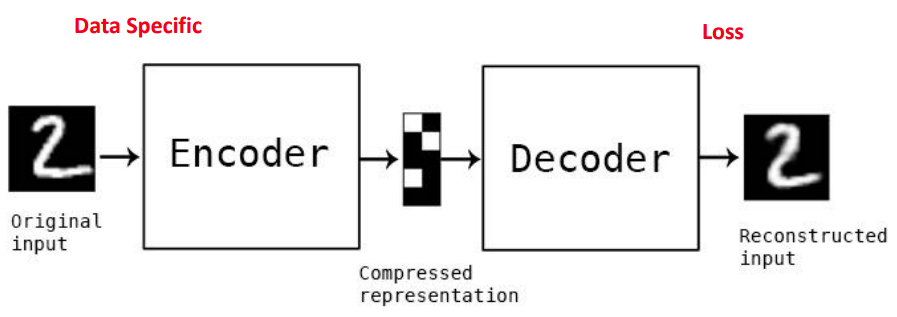

> Unsupervised learning <br>
> Self-supervised learning <br>
> Manifold learning (N차원의 공간을 N보다 작은 저차원의 특성으로 표현하여 학습하는 방법) <br>
> Feature extraction

```
Autoencoder는 내 자신을 작은 차원으로 표현하는 encoder와 작은 차원을 그대로 복원하는 decoder로 구성되어 있는 하나의 모델 

Autoencoder를 이상치 제거에서 활용한다고 했을 때 
Encoder를 거쳐 차원이 줄어들면 핵심 특징을 제외한 것들은 자연스럽게 사라지게 되므로 
noise가 포함된 데이터가 autoencoder를 통과하면 noise는 사라지게 될 것이다  

비용절감 차원에서 좋은 모델  

self-supervised: 자기 자신의 데이터가 target이 된다 
```

## AutoEncoder 구현 

In [ ]:
import tensorflow as tf 

In [ ]:
(X_train, _), (X_test, _) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(60000,28*28)
X_train = X_train/255
X_test = X_test.reshape(10000,28*28)
X_test = X_test/255

In [ ]:
input_ = tf.keras.Input((784,)) # 28x28 image이기 때문에 
encoder = tf.keras.layers.Dense(32)(input_) # layer는 encoder와 decoder가 대칭이 되도록 설계 해야 한다 
encoder = tf.keras.layers.ReLU()(encoder)
decoder = tf.keras.layers.Dense(784, activation='sigmoid')(encoder) # Mnist 

autoencoder = tf.keras.models.Model(input_, decoder)
autoencoder.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer='adam')

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = autoencoder.fit(X_train, X_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1629
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1044
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0966
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0951
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0946
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0942
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0940
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0939
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0938
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0937
Epoch 11/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0936
Epoch 12/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0935
E

In [ ]:
import matplotlib.pyplot as plt

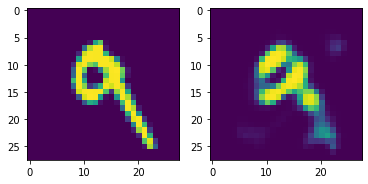

In [ ]:
img = 7

fig, axs = plt.subplots(1,2)
axs[0].imshow(X_test[img].reshape(28,28))
axs[1].imshow(autoencoder(X_test)[img].numpy().reshape(28,28)) # 대표적인 특징만 표현된다 (섬세하게 재현되지는 않는다)

In [ ]:
layer = tf.keras.layers.Dense(1)

In [ ]:
layer.get_config() # activity_regularizer:  레이어 출력에 페널티를 적용하는 정규화 기법 / BN 때문에 더 이상 잘 사용하지 않는다 

{'activation': 'linear',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'dtype': 'float32',
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'kernel_regularizer': None,
 'name': 'dense_2',
 'trainable': True,
 'units': 1,
 'use_bias': True}

## Convolution 결과 복원 

In [ ]:
input_ = tf.keras.Input((28,28,1))
x = tf.keras.layers.Conv2D(16,3, padding='same')(input_)
x = tf.keras.layers.Conv2D(8,3, padding='same')(x)
x = tf.keras.layers.Conv2D(16,3, padding='same')(x)

In [ ]:
model = tf.keras.models.Model(input_, x)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 8)         1160      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 16)        1168      
Total params: 2,488
Trainable params: 2,488
Non-trainable params: 0
_________________________________________________________________


## Sparse Auto-Encoder 

> 차원을 늘리는 모델 

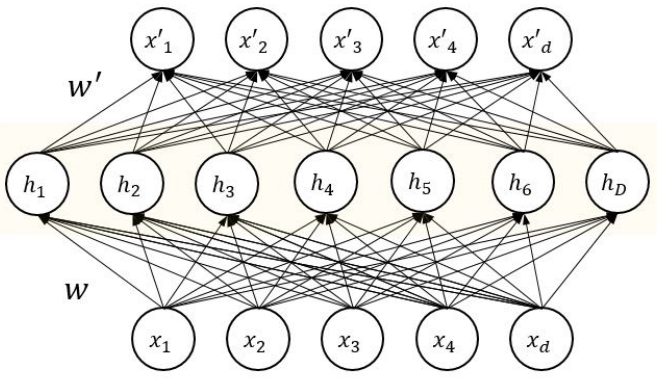